<a href="https://colab.research.google.com/github/AlamProgram/Machine_Learning_Project/blob/main/P2_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/fraudTrain.csv')


**Kolom pada dataset**

---
1. trans_date_trans_time: Waktu transaksi. Dapat digunakan untuk mendeteksi pola waktu (misal transaksi yang sering terjadi pada waktu yang tidak wajar bisa dicurigai sebagai fraud).
2. cc_num: Nomor kartu kredit. Informasi penting terkait pengguna kartu, tetapi tidak langsung membantu mendeteksi fraud kecuali ada pola dari penggunaan kartu yang tidak biasa.
3. merchant: Nama merchant (penjual). Merchant tertentu mungkin lebih sering terlibat dalam transaksi fraud, sehingga bisa membantu mendeteksi risiko terkait merchant.
4. category: Kategori transaksi. Fraud mungkin lebih sering terjadi dalam kategori tertentu seperti barang mewah atau hiburan, yang memiliki nilai transaksi lebih tinggi.
5. amt: Jumlah uang dalam transaksi. Nilai transaksi yang sangat besar atau tidak sesuai dengan pola belanja biasanya bisa menjadi tanda fraud.
6. first: Nama depan pemegang kartu. Tidak terlalu relevan dalam mendeteksi fraud secara langsung.
7. last: Nama belakang pemegang kartu. Sama seperti first, tidak relevan secara langsung.
8. gender: Jenis kelamin pemegang kartu. Bisa digunakan untuk melihat pola demografis terkait fraud, meskipun tidak secara langsung mengindikasikan fraud.
9. street: Alamat jalan pemegang kartu. Dapat digunakan dalam deteksi anomali jika lokasi transaksi berbeda jauh dari alamat pemegang kartu.
10. city: Kota pemegang kartu. Sama seperti street, dapat digunakan untuk memeriksa ketidaksesuaian antara lokasi pemegang kartu dan transaksi.
11. state: Negara bagian pemegang kartu. Sama dengan city, bisa mendeteksi anomali lokasi.
12. zip: Kode pos pemegang kartu. Sama dengan city dan state, bisa membantu mendeteksi anomali geografis.
13. lat: Garis lintang lokasi pemegang kartu. Lokasi geografis dapat membantu mendeteksi ketidaksesuaian jika dibandingkan dengan lokasi transaksi.
14. long: Garis bujur lokasi pemegang kartu. Sama dengan lat, membantu mendeteksi lokasi.
15. city_pop: Populasi kota pemegang kartu. Bisa digunakan untuk memahami risiko terkait daerah, misalnya daerah padat penduduk mungkin memiliki lebih banyak transaksi dan risiko.
16. job: Pekerjaan pemegang kartu. Pekerjaan dengan penghasilan tinggi mungkin lebih rentan terhadap fraud karena lebih sering terlibat dalam transaksi besar.
17. dob: Tanggal lahir pemegang kartu. Usia pemegang kartu bisa menjadi faktor, misalnya kelompok usia tertentu mungkin lebih rentan terhadap fraud.
18. trans_num: ID unik untuk transaksi. Tidak relevan dalam deteksi fraud secara langsung.
19. unix_time: Waktu transaksi dalam format unix. Sama seperti trans_date_trans_time, membantu dalam menganalisis pola waktu.
20. merch_lat: Garis lintang merchant. Dapat digunakan untuk mendeteksi ketidaksesuaian antara lokasi merchant dan pemegang kartu.
21. merch_long: Garis bujur merchant. Sama seperti merch_lat, membantu mendeteksi anomali lokasi.
22. is_fraud: Label apakah transaksi adalah fraud (0 = tidak fraud, 1 = fraud). Ini adalah target yang perlu diprediksi.

In [ ]:
# Show the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#apakah ada data NaN
#buat Heatmap
#buat peta sebaran
#bagaimana pola

# 1. EDA

In [ ]:
df.info()
#tidak ada data NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# see the balance of data (fraud vs non)
df['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


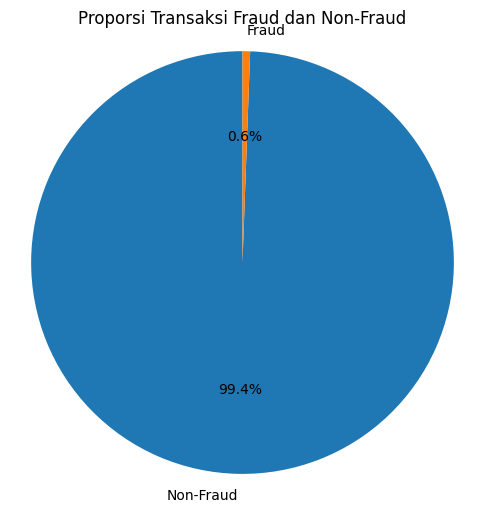

In [ ]:
fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Transaksi Fraud dan Non-Fraud')
plt.axis('equal')
plt.show()

In [ ]:
# Mengubah kolom trans_date_trans_time menjadi menjadi datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [ ]:
# Membuat kolom baru yang berisi kolom jam transaksi dilakukan
df['hour']=df['trans_date_trans_time'].dt.hour

In [ ]:
#Melihat Ciri2 transaksi Fraud

# Get the froud row only
df_froud =df[df['is_fraud']==1]

In [ ]:
# Hitung jumlah transaksi fraud untuk setiap jam
hour_of_froud = df_froud['hour'].value_counts().sort_index()

In [ ]:
hour_of_froud

,count
hour,
0,635
1,658
2,625
3,609
4,46
5,60
6,40
7,56
8,49


<Axes: xlabel='hour'>

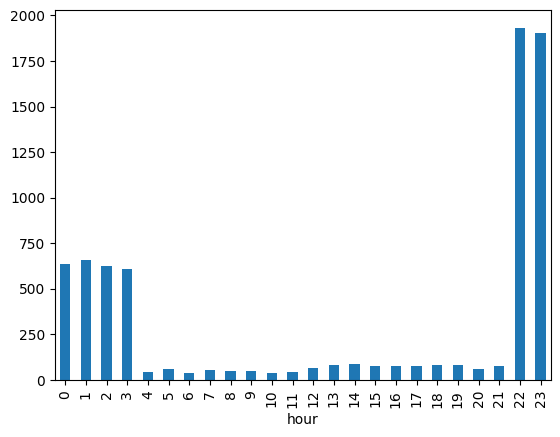

In [ ]:
# Menampilkan Bar Chart Hour of Froud

hour_of_froud.plot(kind = 'bar')

In [ ]:
df_froud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,3
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,3
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,3


## 1.1. Feature Enginering

In [ ]:
# Action Items : Drop Kolom tidak relefan
unless_kolom = ['Unnamed: 0 ']

# Identifier
identifier = ['cc_num', 'first', 'last', 'trans_num']

# Action Items : New Features, OHE , Label Encoder (bertingkat), < 20 drop
category = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time']

# Action Items : New Features = Distance
location = ['lat', 'long', 'merch_lat', 'merch_long']

# Action Items : New Features = Risk Time, Risk Day, Age
datetime = ['trans_date_trans_time', 'dob']

# Action Items : New Features : city_pop category, amt category
numerical = ['amt', 'city_pop']

target = ['is_fraud']

In [ ]:
# Action Items : Drop Kolom tidak relefan
df_1 = df.drop('Unnamed: 0', axis = 1)

# axis = 0  Merepresentasikan baris.
# axis = 1  Merepresentasikan kolom.

### 1.1.1. Drop Identifier Column

In [ ]:
# Identifier,  hapus identifer agar tidak masuk sebagai input model
df_2 = df_1.drop(identifier, axis=1)
df_2.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,0


### 1.1.2. Add Distance Column

In [ ]:
# Install library to calculate the distance
pip install geopy

In [ ]:
from geopy.distance import geodesic

#### 1.1.2.1. Calculate the distance

In [ ]:
df_2['distance'] = df_2.apply(
    lambda row: geodesic((row['lat'], row['long']),
     (row['merch_lat'], row['merch_long'])).km, axis=1)


In [ ]:
df_2.head(3)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,0,108.102912


In [ ]:
df_2.to_csv('df_2.csv', index=False)

# Upload data hasil feature enginering ke GDrive
#df_2.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_2.csv', index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Since calculating the distance will takes time, we prefer to load the df_2 that has the distance column from google drivw
df_2 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_2.csv')

In [ ]:
df_2.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618


#### 1.1.2.2. See The Correlation of distance and the fraud

In [ ]:
# fine out min and max value
min_distance = df_2['distance'].min()
max_distance = df_2['distance'].max()

print(f'Min Distance: {min_distance} km')
print(f'Max Distance: {max_distance} km')

Min Distance: 0.0222735133501133 km
Max Distance: 151.86820020102445 km


In [ ]:
# Memecah rentang nilai menjadi 10 bagian
df_2['far_level'] = pd.cut(df_2['distance'], bins=10, labels=False)



In [ ]:
df_2.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance,far_level
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821,5
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618,1


In [ ]:


#Memilih Hanya Data Fraud
fraud = df_2[df_2['is_fraud']==1]       # pilih data dari df_2 yang memiliki kriteria "df_2['is_fraud']==1"

fraud_each_far_level = fraud['far_level'].value_counts()  # hitung jumlah setiap nilai unik dalam kolom "far_level"



In [ ]:
fraud_each_far_level

,count
far_level,
5,1445
4,1333
6,1280
3,1007
7,906
2,691
1,396
8,297
0,131


<Axes: xlabel='far_level'>

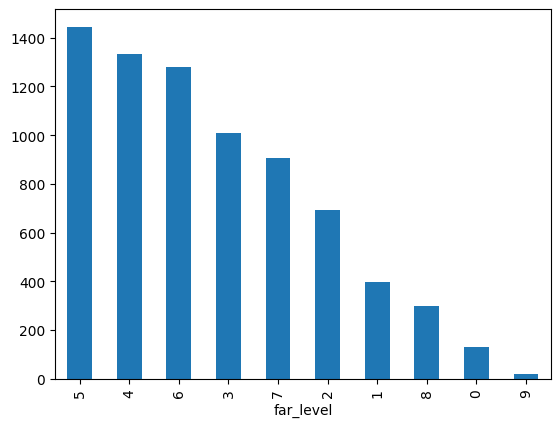

In [ ]:
fraud_each_far_level.plot(kind = 'bar')

In [ ]:
df_2.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance,far_level
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821,5
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,0,108.102912,7
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,0,95.685115,6
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,0,77.702395,5


In [ ]:
def categorize_risk_of_far_level(far_level):
  if far_level ==  5:
    return 10
  if far_level == 4:
    return 9
  if far_level == 6:
    return 8
  if far_level == 3:
    return 7
  if far_level == 7:
    return 6
  if far_level == 2:
    return 5
  if far_level == 1:
    return 4
  if far_level == 8:
    return 3
  if far_level == 0:
    return 2
  if far_level == 9:
    return 1

df_2['risk_category_of_far_level'] = df_2['far_level'] .apply(categorize_risk_of_far_level)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trans_date_trans_time       1296675 non-null  object 
 1   merchant                    1296675 non-null  object 
 2   category                    1296675 non-null  object 
 3   amt                         1296675 non-null  float64
 4   gender                      1296675 non-null  object 
 5   street                      1296675 non-null  object 
 6   city                        1296675 non-null  object 
 7   state                       1296675 non-null  object 
 8   zip                         1296675 non-null  int64  
 9   lat                         1296675 non-null  float64
 10  long                        1296675 non-null  float64
 11  city_pop                    1296675 non-null  int64  
 12  job                         1296675 non-null  object 
 1

In [ ]:
df_2.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance,far_level,risk_category_of_far_level
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821,5,10
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618,1,4


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trans_date_trans_time       1296675 non-null  object 
 1   merchant                    1296675 non-null  object 
 2   category                    1296675 non-null  object 
 3   amt                         1296675 non-null  float64
 4   gender                      1296675 non-null  object 
 5   street                      1296675 non-null  object 
 6   city                        1296675 non-null  object 
 7   state                       1296675 non-null  object 
 8   zip                         1296675 non-null  int64  
 9   lat                         1296675 non-null  float64
 10  long                        1296675 non-null  float64
 11  city_pop                    1296675 non-null  int64  
 12  job                         1296675 non-null  object 
 1

In [ ]:

df_3 = df_2


In [ ]:
df_3.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance,far_level,risk_category_of_far_level
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821,5,10
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618,1,4


In [ ]:
df_3.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_3.csv', index=False)




In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_3.csv')

In [ ]:
df_3.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance,far_level,risk_category_of_far_level
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821,5,10
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618,1,4


#### 1.1.2.3. Add Column of year, month, day, hour

In [ ]:
df_3.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,hour,distance,far_level,risk_category_of_far_level
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,0,78.773821,5,10
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,0,30.216618,1,4


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trans_date_trans_time       1296675 non-null  object 
 1   merchant                    1296675 non-null  object 
 2   category                    1296675 non-null  object 
 3   amt                         1296675 non-null  float64
 4   gender                      1296675 non-null  object 
 5   street                      1296675 non-null  object 
 6   city                        1296675 non-null  object 
 7   state                       1296675 non-null  object 
 8   zip                         1296675 non-null  int64  
 9   lat                         1296675 non-null  float64
 10  long                        1296675 non-null  float64
 11  city_pop                    1296675 non-null  int64  
 12  job                         1296675 non-null  object 
 1

In [ ]:
df_3['trans_date_trans_time'] = pd.to_datetime(df_3['trans_date_trans_time'])

In [ ]:
df_3['year']=  df_3['trans_date_trans_time'].dt.year
df_3['month']= df_3['trans_date_trans_time'].dt.month
df_3['day']=   df_3['trans_date_trans_time'].dt.day
df_3['hour']=  df_3['trans_date_trans_time'].dt.hour
df_3['day_of_week']= df_3['trans_date_trans_time'].dt.day_name()


In [ ]:
df_3.tail(10)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,merch_long,is_fraud,hour,distance,far_level,risk_category_of_far_level,year,month,day,day_of_week
1296665,2020-06-21 12:08:42,fraud_Gulgowski LLC,home,72.17,M,7369 Gabriel Tunnel,Pointe Aux Pins,MI,49775,45.7549,...,-83.996234,0,12,97.371601,6,8,2020,6,21,Sunday
1296666,2020-06-21 12:09:22,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,F,6296 John Keys Suite 858,Pembroke Township,IL,60958,41.0646,...,-88.092339,0,12,70.456765,4,9,2020,6,21,Sunday
1296667,2020-06-21 12:10:56,"fraud_Hahn, Douglas and Schowalter",travel,19.71,M,97070 Anderson Land,Haines City,FL,33844,28.0758,...,-81.511804,0,12,68.060786,4,9,2020,6,21,Sunday
1296668,2020-06-21 12:11:23,"fraud_Metz, Russel and Metz",kids_pets,100.85,F,742 Oneill Shore,Florence,MS,39073,32.1530,...,-90.528450,0,12,94.208072,6,8,2020,6,21,Sunday
1296669,2020-06-21 12:11:36,fraud_Stiedemann Inc,misc_pos,37.38,F,474 Allen Haven,North Loup,NE,68859,41.4972,...,-99.039660,0,12,33.293541,2,5,2020,6,21,Sunday
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,...,-111.690765,0,12,119.696415,7,6,2020,6,21,Sunday
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,...,-78.246528,0,12,75.202184,4,9,2020,6,21,Sunday
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,...,-105.130529,0,12,98.987927,6,8,2020,6,21,Sunday
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,...,-103.241160,0,12,84.688356,5,10,2020,6,21,Sunday
1296674,2020-06-21 12:13:37,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,M,135 Joseph Mountains,Sula,MT,59871,45.8433,...,-114.186110,0,12,83.845902,5,10,2020,6,21,Sunday


In [ ]:
#See the patter of fraud cases in each time
fraud_year = df_3.loc[:,['is_fraud', 'year']]
fraud_year.head(2)
fraud_year =fraud_year[fraud_year['is_fraud']==1]


<Axes: xlabel='year'>

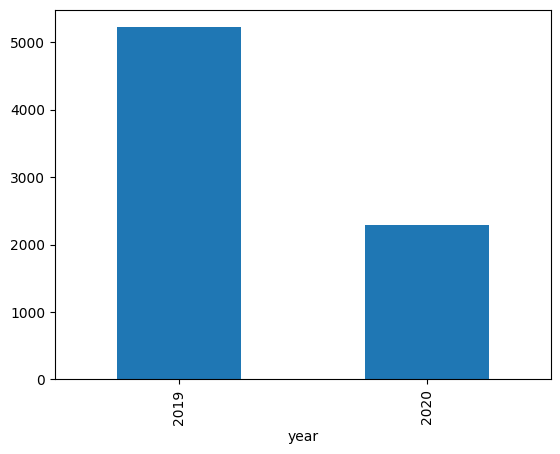

In [ ]:
fraud_year_count = fraud_year.value_counts('year')
fraud_year_count.plot(kind = 'bar')

Note:
Lebih banyak penipuan di tahun 2019, tetapi pelebelan tahun 2019 tidak relevan karen model untuk  emmpredikasi masa depan/tahun2 berikutnya

##### Month

In [ ]:
#See the patter of fraud cases in each time
fraud_month = df_3.loc[:,['is_fraud', 'month']]
fraud_month.head(2)
fraud_month =fraud_month[fraud_month['is_fraud']==1]



<Axes: xlabel='month'>

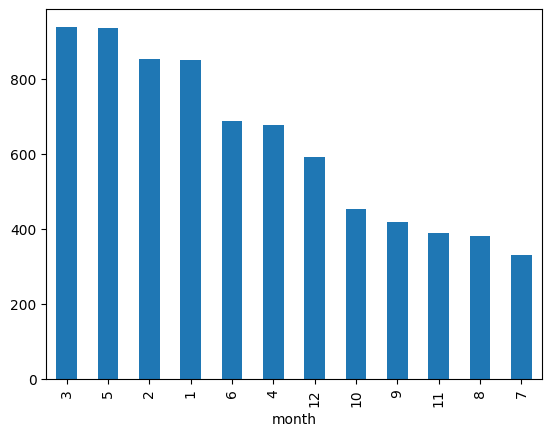

In [ ]:
# Make the bar plot
fraud_month_count = fraud_month.value_counts('month')
fraud_month_count.plot(kind = 'bar')

In [ ]:

'''# Lakukan one-hot encoding
df_encoded_far = pd.get_dummies(df_3['month'], prefix='', prefix_sep='')

# Gabungkan dengan DataFrame asli
df_3 = pd.concat([df_3, df_encoded_far], axis=1)

# Ganti nama kolom sesuai keinginan Anda
df_3 = df_3.rename(columns={'1': 'isJan', '2': 'isFeb', '3': 'isMar','4': 'isApr','5': 'isMey','6': 'isJun',
                           '7': 'isJul', '8': 'isAug', '9': 'isSep','10': 'isOct','11': 'isNov','12': 'isDes',})'''

In [ ]:
# Lakukan Label Encoding untuk urutan fraud pada month

# Urutan bulan berdasarkan jumlah kasus fraud tertinggi
month_order = [3, 5, 2, 1, 6, 4, 12, 10, 9, 11, 8, 7]

# Buat mapping label encoding
mapping = {bulan: index + 1 for index, bulan in enumerate(month_order)}

# Terapkan label encoding
df_3['month_encoded'] = df_3['month'].map(mapping)


In [ ]:
df_3.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,is_fraud,hour,distance,far_level,risk_category_of_far_level,year,month,day,day_of_week,month_encoded
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,0,0,78.773821,5,10,2019,1,1,Tuesday,4
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,0,0,30.216618,1,4,2019,1,1,Tuesday,4


##### Day

<Axes: xlabel='day'>

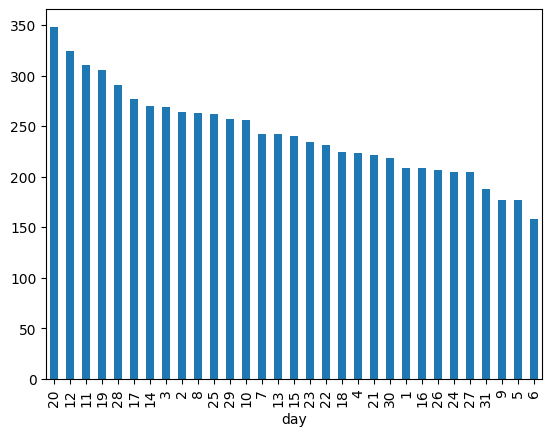

In [ ]:
#pilih kolom
df_3_day = df_3.loc[:, ['is_fraud', 'day']]
#pilih fraud
df_3_day_fraud = df_3_day[df_3_day['is_fraud'] ==1]
#hitung value_count
df_3_day_fraud_count = df_3_day_fraud.value_counts('day')
#buat bar chart
df_3_day_fraud_count.plot(kind = 'bar')

In [ ]:
fraud_by_day_in_month = df_3[df_3['is_fraud'] == 1]['day'].value_counts().sort_values(ascending=False)
print(fraud_by_day_in_month)

day
20    348
12    324
11    310
19    305
28    291
17    277
14    270
3     269
2     264
8     263
25    262
29    257
10    256
13    242
7     242
15    240
23    234
22    231
18    224
4     223
21    221
30    218
16    209
1     209
26    207
24    205
27    205
31    188
5     177
9     177
6     158
Name: count, dtype: int64


In [ ]:
# Buat mapping label encoding
mapping = {tanggal: index + 1 for index, tanggal in enumerate(fraud_by_day_in_month.index)}

# Terapkan label encoding
df_3['day_encoded_in_month'] = df_3['day'].map(mapping)

In [ ]:
df_3.head(2)



,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,hour,distance,far_level,risk_category_of_far_level,year,month,day,day_of_week,month_encoded,day_encoded_in_month
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,0,78.773821,5,10,2019,1,1,Tuesday,4,24
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,0,30.216618,1,4,2019,1,1,Tuesday,4,24


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   trans_date_trans_time       1296675 non-null  datetime64[ns]
 1   merchant                    1296675 non-null  object        
 2   category                    1296675 non-null  object        
 3   amt                         1296675 non-null  float64       
 4   gender                      1296675 non-null  object        
 5   street                      1296675 non-null  object        
 6   city                        1296675 non-null  object        
 7   state                       1296675 non-null  object        
 8   zip                         1296675 non-null  int64         
 9   lat                         1296675 non-null  float64       
 10  long                        1296675 non-null  float64       
 11  city_pop                

##### Day of Week

<Axes: xlabel='day_of_week'>

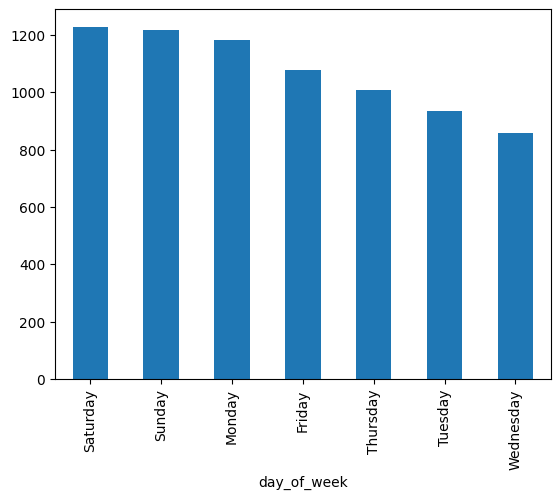

In [ ]:
# pilih kolom
df_3_day_of_week = df_3.loc[:, ['is_fraud', 'day_of_week']]
# pilih fraud saja
df_3_day_of_week_fraud = df_3_day_of_week[df_3_day_of_week['is_fraud']==1]
# hitung
df_3_day_of_weeek_fraud_count = df_3_day_of_week_fraud.value_counts('day_of_week')

# buat bar chart
df_3_day_of_weeek_fraud_count.plot(kind = 'bar')

In [ ]:
df_3_day_of_weeek_fraud_count

,count
day_of_week,
Saturday,1227
Sunday,1216
Monday,1182
Friday,1079
Thursday,1008
Tuesday,935
Wednesday,859


In [ ]:
#terapkan label encoding untuk day of Week
fraud_by_day_in_week = df_3[df_3['is_fraud'] == 1]['day_of_week'].value_counts().sort_values(ascending=False)
print(fraud_by_day_in_week)


day_of_week
Saturday     1227
Sunday       1216
Monday       1182
Friday       1079
Thursday     1008
Tuesday       935
Wednesday     859
Name: count, dtype: int64


In [ ]:
# Buat mapping label encoding
mapping = {tanggal: index + 1 for index, tanggal in enumerate(fraud_by_day_in_week.index)}



In [ ]:
# Terapkan label encoding
df_3['day_encoded_in_week'] = df_3['day_of_week'].map(mapping)

In [ ]:
df_3.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,distance,far_level,risk_category_of_far_level,year,month,day,day_of_week,month_encoded,day_encoded_in_month,day_encoded_in_week
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,78.773821,5,10,2019,1,1,Tuesday,4,24,6
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,30.216618,1,4,2019,1,1,Tuesday,4,24,6


In [ ]:
df_3.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_4.csv', index=False)

In [ ]:
df_4 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_4.csv')

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trans_date_trans_time       1296675 non-null  object 
 1   merchant                    1296675 non-null  object 
 2   category                    1296675 non-null  object 
 3   amt                         1296675 non-null  float64
 4   gender                      1296675 non-null  object 
 5   street                      1296675 non-null  object 
 6   city                        1296675 non-null  object 
 7   state                       1296675 non-null  object 
 8   zip                         1296675 non-null  int64  
 9   lat                         1296675 non-null  float64
 10  long                        1296675 non-null  float64
 11  city_pop                    1296675 non-null  int64  
 12  job                         1296675 non-null  object 
 1


#### 1.1.2.4. Add column for each categories (One hot Encoding)

In [ ]:
df_4.value_counts('category')

,count
category,
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758


<Axes: xlabel='category'>

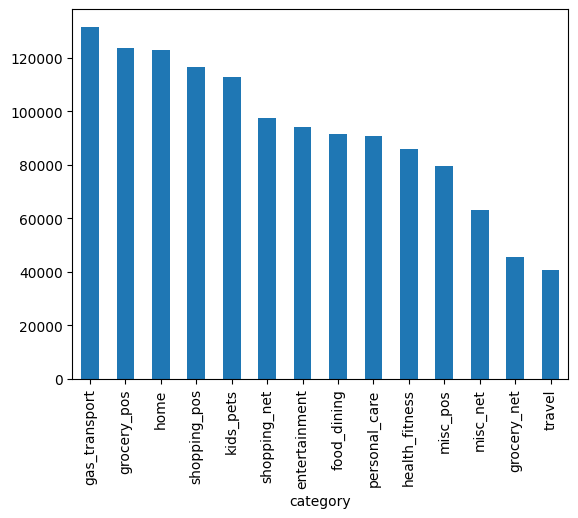

In [ ]:
#buat bar chart
df_4['category'].value_counts().plot(kind = 'bar')

In [ ]:
# membuat Label Encoding untuk catogory
fraud_by_category = df_4[df_4['is_fraud']==1]['category'].value_counts().sort_values(ascending=False)

# Buat Mapping label encoding
mapping = {kategori: index + 1 for index, kategori in enumerate(fraud_by_category.index)}

# Terapkan label encoding
df_4['category_encoded'] = df_4['category'].map(mapping)

In [ ]:
df_4.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,far_level,risk_category_of_far_level,year,month,day,day_of_week,month_encoded,day_encoded_in_month,day_encoded_in_week,category_encoded
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,5,10,2019,1,1,Tuesday,4,24,6,3
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,1,4,2019,1,1,Tuesday,4,24,6,1


#### 1.1.2.5.See the relation of age and fraud

In [ ]:
# Hitung Umur pengguna kartu dengan
# year - dob
df_4['age'] = df_4['year'] - pd.to_datetime(df_4['dob'], format='%Y-%m-%d').dt.year

In [ ]:
df_4.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,risk_category_of_far_level,year,month,day,day_of_week,month_encoded,day_encoded_in_month,day_encoded_in_week,category_encoded,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,10,2019,1,1,Tuesday,4,24,6,3,31
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,4,2019,1,1,Tuesday,4,24,6,1,41


In [ ]:
#Menghitung nilai unik untuk setiap umur
df_age_fraud = df_4.loc[df_4['is_fraud']==1, 'age']

df_age_fraud.value_counts()

,count
age,
49,201
33,197
58,195
43,185
22,175
...,...
93,16
15,16
75,12


<Axes: xlabel='age'>

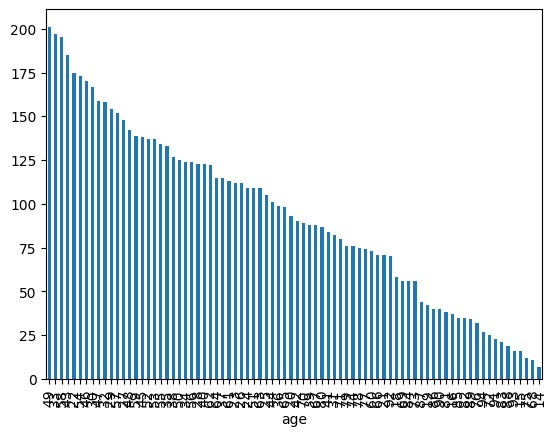

In [ ]:
df_age_fraud.value_counts().plot(kind = 'bar')

In [ ]:
# Membuat label encoding untuk kolom umur
# 1. Membuat list dari kategori umur yang paling banyak mengalami fraud
fraud_by_age = df_4[df_4['is_fraud']==1]['age'].value_counts().sort_values(ascending=False)

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trans_date_trans_time       1296675 non-null  object 
 1   merchant                    1296675 non-null  object 
 2   category                    1296675 non-null  object 
 3   amt                         1296675 non-null  float64
 4   gender                      1296675 non-null  object 
 5   street                      1296675 non-null  object 
 6   city                        1296675 non-null  object 
 7   state                       1296675 non-null  object 
 8   zip                         1296675 non-null  int64  
 9   lat                         1296675 non-null  float64
 10  long                        1296675 non-null  float64
 11  city_pop                    1296675 non-null  int64  
 12  job                         1296675 non-null  object 
 1

#### 1.1.2.5.See the relation of city, state, pop_city and fraud

##### City

In [ ]:
#Mencari Tau Jumlah City
# Mendapatkan array nilai-nilai unik
daftar_kota_unik = df_4['city'].unique()

# Menghitung jumlah nilai unik
jumlah_kota_berbeda = len(daftar_kota_unik)

print(f"Jumlah kota yang berbeda: {jumlah_kota_berbeda}")

Jumlah kota yang berbeda: 894


In [ ]:
#Mencari Tau Jumlah City yang menmiliki kasus fraud

# Memilih hanya data fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['city']]

# Mendapatkan array nilai-nilai unik
daftar_kota_unik_f = df_4_f['city'].unique()

# Menghitung jumlah nilai unik
jumlah_kota_berbeda = len(daftar_kota_unik_f)

print(f"Jumlah kota yang berbeda: {jumlah_kota_berbeda}")

Jumlah kota yang berbeda: 702


karena berdasarkan kota tidak ada yang melebihi 50 kasus per kota sehingga tidak perlu diberikan flagging.

<Axes: xlabel='city'>

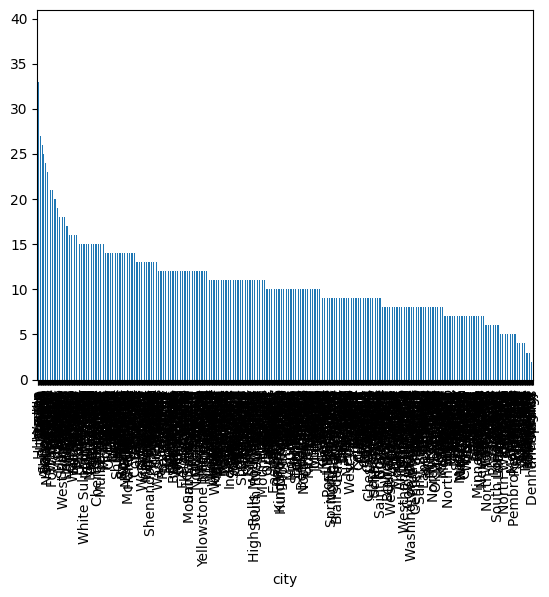

In [ ]:
df_4_f['city'].value_counts().plot(kind = 'bar')

##### Popolation of City

In [ ]:
#Mencari Tau Jumlah City yang menmiliki kasus fraud

# Memilih hanya data fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['city']]

# Mendapatkan array nilai-nilai unik
daftar_kota_unik_f = df_4_f['city'].unique()

# Menghitung jumlah nilai unik
jumlah_kota_berbeda = len(daftar_kota_unik_f)

print(f"Jumlah kota yang berbeda: {jumlah_kota_berbeda}")

Jumlah kota yang berbeda: 702


In [ ]:
# Mencaritahu hubungan antara populasi kota dengan jumlah kasus fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['city_pop']]


<Axes: xlabel='city_pop'>

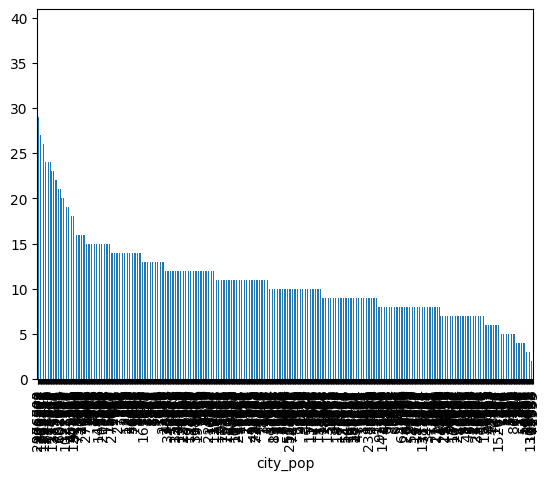

In [ ]:
df_4_f['city_pop'].value_counts().plot(kind = 'bar')

In [ ]:
fraud_by_city_pop = df_4[df_4['is_fraud'] == 1].groupby('city_pop').size().reset_index(name='fraud_count_by_city_pop')


In [ ]:
fraud_by_city_pop.head()

,city_pop,fraud_count_by_city_pop
0,23,6
1,37,9
2,46,12
3,47,6
4,49,14


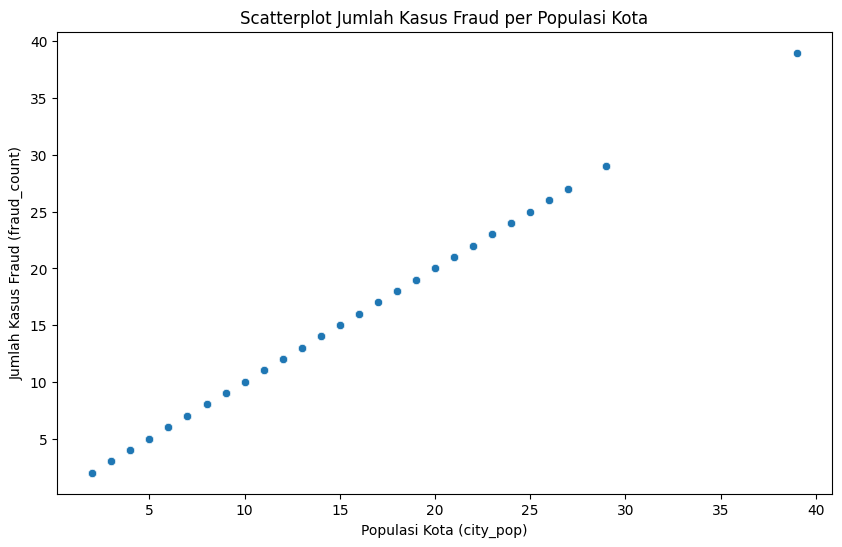

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fraud_count_by_city_pop', y='fraud_count_by_city_pop', data=fraud_by_city_pop)
plt.title('Scatterplot Jumlah Kasus Fraud per Populasi Kota')
plt.xlabel('Populasi Kota (city_pop)')
plt.ylabel('Jumlah Kasus Fraud (fraud_count)')
plt.show()

In [ ]:
# get the correlation value
correlation_value = fraud_by_city_pop['city_pop'].corr(fraud_by_city_pop['fraud_count_by_city_pop'])

print("Correlation Value:", correlation_value)

Correlation Value: 0.21819507372346222


karena korelasinya rendh kita hilangkan saja

##### State

In [ ]:
#Mencari Tau Jumlah State
# Mendapatkan array nilai-nilai unik
daftar_State_unik = df_4['state'].unique()

# Menghitung jumlah nilai unik
jumlah_State_berbeda = len(daftar_kota_unik)

print(f"Jumlah kota yang berbeda: {jumlah_State_berbeda}")

Jumlah kota yang berbeda: 894


In [ ]:
#Mencari Tau Jumlah State yang menmiliki kasus fraud

# Memilih hanya data fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['state']]

# Mendapatkan array nilai-nilai unik
daftar_State_unik_f = df_4_f['state'].unique()

# Menghitung jumlah nilai unik
jumlah_State_berbeda = len(daftar_kota_unik_f)

print(f"Jumlah kota yang berbeda: {jumlah_State_berbeda}")

Jumlah kota yang berbeda: 702


In [ ]:
# Mencaritahu hubungan antara populasi kota dengan jumlah kasus fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['state']]


<Axes: xlabel='state'>

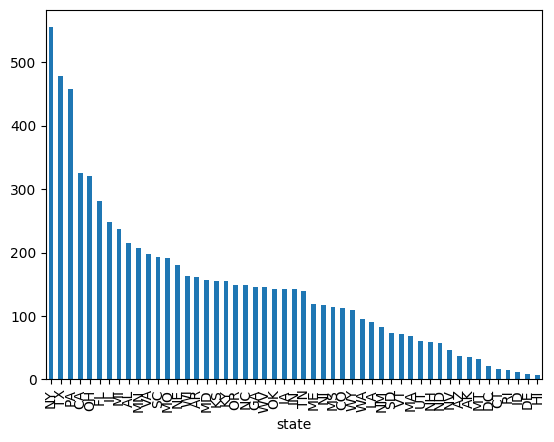

In [ ]:
df_4_f['state'].value_counts().plot(kind = 'bar')

###### Lable Encoder

In [ ]:
# Hitung jumlah nilai 1 pada col2 untuk setiap kategori di col3
grouped_data = df_4.groupby('state')['is_fraud'].sum().sort_values(ascending=False)
print(grouped_data)

state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
VA    198
SC    193
MO    191
NE    180
WI    163
AR    161
MD    157
KS    156
KY    155
OR    149
NC    149
GA    146
WV    146
OK    143
IN    142
IA    142
TN    140
ME    119
NJ    118
MS    115
CO    113
WY    110
WA     96
LA     91
NM     82
SD     74
VT     72
MA     69
UT     61
NH     59
ND     57
NV     47
AZ     37
AK     36
MT     32
DC     21
CT     16
RI     15
ID     11
DE      9
HI      7
Name: is_fraud, dtype: int64


In [ ]:
#Membuat Mapping Label Encoding Berdasarkan Urutan
mapping = {category: i for i, category in enumerate(grouped_data.index)}

In [ ]:
#Melakukan Label Encoding pada Kolom Label_Encoding_State
df_4['Label_Encoding_State'] = df_4['state'].map(mapping)

In [ ]:
df_4.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,year,month,day,day_of_week,month_encoded,day_encoded_in_month,day_encoded_in_week,category_encoded,age,Label_Encoding_State
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,2019,1,1,Tuesday,4,24,6,3,31,20
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,2019,1,1,Tuesday,4,24,6,1,41,32
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,2019,1,1,Tuesday,4,24,6,8,57,48
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,2019,1,1,Tuesday,4,24,6,5,52,44
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,2019,1,1,Tuesday,4,24,6,6,33,10


#### 1.1.2.6. OHE for gender

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#buat kolom isMale
df_4['isMale'] = (df_4['gender'] == 'M').astype(int)

In [ ]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
warna_encoded = encoder.fit_transform(df_4[['gender']])

# Buat DataFrame dari hasil encoding
df_4_gender_OHE = pd.DataFrame(warna_encoded, columns=encoder.get_feature_names_out(['gender']))

# Gabungkan dengan DataFrame asli (opsional)
df_5 = pd.concat([df_4, df_4_gender_OHE], axis=1)


In [ ]:
df_5.head(4)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,...,day_of_week,month_encoded,day_encoded_in_month,day_encoded_in_week,category_encoded,age,Label_Encoding_State,isMale,gender_F,gender_M
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,Tuesday,4,24,6,3,31,20,0,1.0,0.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Tuesday,4,24,6,1,41,32,0,1.0,0.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,Tuesday,4,24,6,8,57,48,1,0.0,1.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,Tuesday,4,24,6,5,52,44,1,0.0,1.0


In [ ]:
df_4 = df_5

#### 1.1.2.7. See the relation of amount and fraud

In [ ]:
# Hitung jumlah nilai 1 pada is_fraud untuk setiap kategori di amt
grouped_data_amt = df_4.groupby('amt')['is_fraud'].sum().sort_values(ascending=False)
print(grouped_data_amt)

amt
8.75        6
18.55       6
10.64       5
19.77       5
19.36       5
           ..
184.52      0
184.53      0
184.54      0
184.55      0
28948.90    0
Name: is_fraud, Length: 52928, dtype: int64


In [ ]:
#Mencari Tau Jumlah amt yang menmiliki kasus fraud

# Memilih hanya data fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['amt']]

# Mendapatkan array nilai-nilai unik
daftar_amt_unik_f = df_4_f['amt'].unique()

# Menghitung jumlah nilai unik
jumlah_amt_berbeda = len(daftar_amt_unik_f)

print(f"Jumlah kota yang berbeda: {jumlah_amt_berbeda}")

Jumlah kota yang berbeda: 6639


In [ ]:
# Mencaritahu hubungan antara populasi kota dengan jumlah kasus fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['amt']]

<Axes: xlabel='amt'>

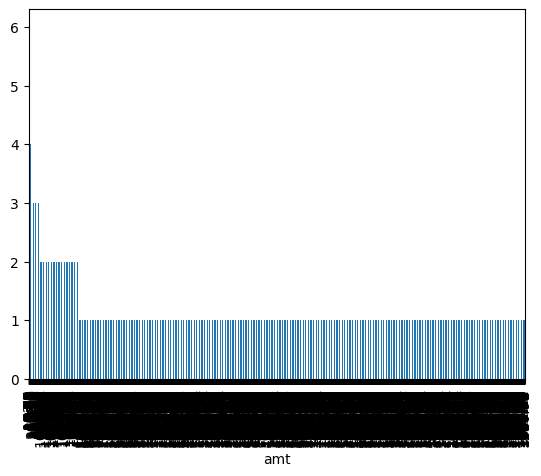

In [ ]:
df_4_f['amt'].value_counts().plot(kind = 'bar')

In [ ]:
fraud_by_amt = df_4[df_4['is_fraud'] == 1].groupby('amt').size().reset_index(name='is_fraud')
fraud_by_amt.head()


,amt,is_fraud
0,1.06,1
1,1.18,2
2,1.51,1
3,1.91,1
4,2.13,1


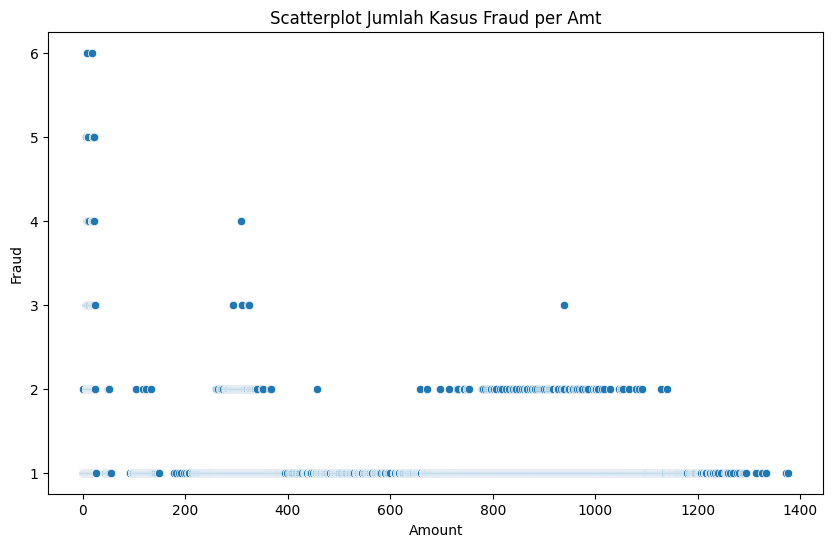

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='is_fraud', data=fraud_by_amt)
plt.title('Scatterplot Jumlah Kasus Fraud per Amt')
plt.xlabel('Amount')
plt.ylabel('Fraud')
plt.show()

In [ ]:
#get the correlation value
correlation_value = fraud_by_amt['amt'].corr(fraud_by_amt['is_fraud'])

print("Correlation Value:", correlation_value)

Correlation Value: -0.2997167566882835


Karena korelasi amt dengan jumlah kasus fraud rendah, maka akan kita hilangkan sebagai variabel prediktor

#### 1.1.2.8. See the relation of job and fraud

In [ ]:
#Mencari Tau Jumlah Job
# Mendapatkan array nilai-nilai unik
daftar_Job_unik = df_4['job'].unique()

# Menghitung jumlah nilai unik
jumlah_Job_berbeda = len(daftar_Job_unik)

print(f"Jumlah Job yang berbeda: {jumlah_Job_berbeda}")

Jumlah Job yang berbeda: 494


In [ ]:
#Mencari Tau Jumlah Job yang menmiliki kasus fraud

# Memilih hanya data fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['job']]

# Mendapatkan array nilai-nilai unik
daftar_Job_unik_f = df_4_f['job'].unique()

# Menghitung jumlah nilai unik
jumlah_Job_berbeda = len(daftar_Job_unik_f)

print(f"Jumlah Job yang berbeda: {jumlah_Job_berbeda}")

Jumlah Job yang berbeda: 443


In [ ]:
# Mencaritahu hubungan antara job dengan jumlah kasus fraud
df_4_f = df_4.loc[df_4['is_fraud']==1,['job']]

In [ ]:
job = df_4['job'].value_counts()
print(job)

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64


<Axes: xlabel='job'>

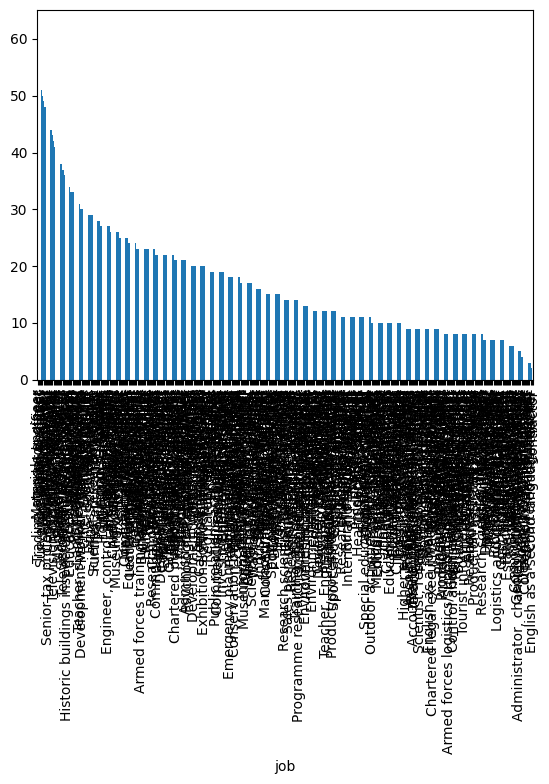

In [ ]:
df_4_f['job'].value_counts().plot(kind = 'bar')

karena terlalu bervariasi, maka kita hilangkan sebagai variabel prediktor

#### 1.1.2.9. add column of high risk hour

In [ ]:
#label encoding manual
# Buat kolom risk_hour menggunakan loop
risk_hour = []
for hour in df_4['hour']:
    if hour in [22, 23]:
        risk_hour.append(3)
    elif hour in [0, 1, 2, 3]:  # Gunakan elif (else if) di sini
        risk_hour.append(2)
    else:
        risk_hour.append(1)
df_4['risk_hour'] = risk_hour


#### Choose only relevant variabel

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trans_date_trans_time       1296675 non-null  object 
 1   merchant                    1296675 non-null  object 
 2   category                    1296675 non-null  object 
 3   amt                         1296675 non-null  float64
 4   gender                      1296675 non-null  object 
 5   street                      1296675 non-null  object 
 6   city                        1296675 non-null  object 
 7   state                       1296675 non-null  object 
 8   zip                         1296675 non-null  int64  
 9   lat                         1296675 non-null  float64
 10  long                        1296675 non-null  float64
 11  city_pop                    1296675 non-null  int64  
 12  job                         1296675 non-null  object 
 1

In [ ]:
# Mendapatkan nama kolom
nama_kolom = df_4.columns

# Menampilkan nama kolom
print(nama_kolom)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'distance', 'far_level', 'risk_category_of_far_level', 'year', 'month',
       'day', 'day_of_week', 'month_encoded', 'day_encoded_in_month',
       'day_encoded_in_week', 'category_encoded', 'age',
       'Label_Encoding_State', 'isMale', 'gender_F', 'gender_M', 'risk_hour'],
      dtype='object')


In [ ]:
# Daftar kolom yang ingin dikecualikan
kolom_dihapus = ['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'street',
                 'city', 'state', 'zip', 'lat','long','merch_lat', 'merch_long', 'city_pop', 'job','dob',
                 'day_of_week', 'far_level', 'year', 'month', 'day', 'age', 'hour', 'distance', 'unix_time' ]

# Membuat DataFrame baru dengan mengecualikan kolom-kolom tertentu
df_5 = df_4.drop(kolom_dihapus, axis=1)



In [ ]:
df_5.head(4)

,is_fraud,risk_category_of_far_level,month_encoded,day_encoded_in_month,day_encoded_in_week,category_encoded,Label_Encoding_State,isMale,gender_F,gender_M,risk_hour
0,0,10,4,24,6,3,20,0,1.0,0.0,2
1,0,4,4,24,6,1,32,0,1.0,0.0,2
2,0,6,4,24,6,8,48,1,0.0,1.0,2
3,0,8,4,24,6,5,44,1,0.0,1.0,2


In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   is_fraud                    1296675 non-null  int64  
 1   risk_category_of_far_level  1296675 non-null  int64  
 2   month_encoded               1296675 non-null  int64  
 3   day_encoded_in_month        1296675 non-null  int64  
 4   day_encoded_in_week         1296675 non-null  int64  
 5   category_encoded            1296675 non-null  int64  
 6   Label_Encoding_State        1296675 non-null  int64  
 7   isMale                      1296675 non-null  int64  
 8   gender_F                    1296675 non-null  float64
 9   gender_M                    1296675 non-null  float64
 10  risk_hour                   1296675 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 108.8 MB


In [ ]:
#simpan df_5 ke google drive
df_5.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_5.csv', index=False)



In [3]:
#panggil df_5
df_5 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/df_5.csv')

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   is_fraud                    1296675 non-null  int64  
 1   risk_category_of_far_level  1296675 non-null  int64  
 2   month_encoded               1296675 non-null  int64  
 3   day_encoded_in_month        1296675 non-null  int64  
 4   day_encoded_in_week         1296675 non-null  int64  
 5   category_encoded            1296675 non-null  int64  
 6   Label_Encoding_State        1296675 non-null  int64  
 7   isMale                      1296675 non-null  int64  
 8   gender_F                    1296675 non-null  float64
 9   gender_M                    1296675 non-null  float64
 10  risk_hour                   1296675 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 108.8 MB


# 2. Train Test Val Split

In [27]:

from sklearn.model_selection import train_test_split


In [28]:

# Split data into X and y
X = df_5.drop('is_fraud', axis=1)
y = df_5['is_fraud']

#split data into Train and Temp
#Temp is used as varioabel to store Validation and Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [6]:
# 2. Oversampling Data Pelatihan
from imblearn.over_sampling import SMOTE # Tambahkan baris impor ini


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

SMOTE (Synthetic Minority Over-sampling Technique)

Kenapa SMOTE: masalah ketidak seimbangan kelas
Dalam banyak masalah klasifikasi, dataset mungkin tidak seimbang, artinya satu kelas (kelas mayoritas) memiliki jumlah sampel yang jauh lebih banyak daripada kelas lainnya (kelas minoritas). Hal ini dapat menyebabkan model machine learning menjadi bias terhadap kelas mayoritas dan memiliki kinerja yang buruk pada kelas minoritas.

1. SMOTE adalah teknik oversampling yang digunakan untuk mengatasi ketidakseimbangan kelas.
2. SMOTE membuat sampel sintetis dari kelas minoritas untuk menyeimbangkan distribusi kelas



#3. Modelling (Random Forest)

In [9]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.7 MB/s eta 0:00:00


##3.1 Hyperparameter Tuning

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna


In [ ]:
# Latih Model dengan Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Dapatkan parameter terbaik dari Optuna
best_params = study.best_params
print(best_param)


[I 2025-03-02 03:28:22,866] A new study created in memory with name: no-name-714a6924-5265-479b-bd4c-8775c50f672b
[I 2025-03-02 03:36:21,707] Trial 0 finished with value: 0.9757997347070981 and parameters: {'n_estimators': 127, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9757997347070981.
[I 2025-03-02 03:46:18,219] Trial 1 finished with value: 0.8653484282937964 and parameters: {'n_estimators': 145, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9757997347070981.
[I 2025-03-02 03:53:40,653] Trial 2 finished with value: 0.8648651427748815 and parameters: {'n_estimators': 108, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9757997347070981.
[I 2025-03-02 04:08:22,818] Trial 3 finished with value: 0.986673658882685 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 3 with valu

In [ ]:
#Trial 63 finished with value: 0.9881132327688147 and parameters: {'n_estimators': 174, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 63 with value: 0.9881132327688147.

##3.2 Modelling Data

In [ ]:
# Inisialisasi model Random Forest dengan hyperparameter hasil Tuning
rf_classifier = RandomForestClassifier(
    n_estimators=174,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42  # Untuk hasil yang dapat direproduksi
)

# Latih model
rf_classifier.fit(X_train_smote, y_train_smote)



RandomForestClassifier(min_samples_split=10, n_estimators=174, random_state=42)

In [ ]:

# 4. Evaluasi Model pada Data Pengujian Asli
y_pred_test = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Akurasi pada data pengujian: {accuracy_test}")



Akurasi pada data pengujian: 0.990601639057696


In [ ]:
import joblib

In [ ]:
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/Fraud_Detection_RForest_P2.joblib' #ganti model_fraud dengan nama model yang diinginkan
joblib.dump(rf_classifier, model_filename)
print(f"Model disimpan di: {model_filename}")

Model disimpan di: /content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/Fraud_Detection_RForest_P2.joblib


In [ ]:
# Predict on the test set
y_pred =rf_classifier.predict(X_val)

# Predict probabilities for ROC-AUC evaluation
y_pred_prob = rf_classifier.predict_proba(X_val)[:, 1]

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
print(f"Akurasi Validation: {accuracy}")

Akurasi Validation: 0.990848376100894


##3.3 Matrix Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_val, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Fraud', 'Actual Fraud'], columns=['Predicted Non-Fraud', 'Predicted Fraud'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')
# Calculate ROC-AUC score for model's ability to distinguish between classes
roc_auc = roc_auc_score(y_val, y_pred_prob)
print("ROC-AUC Score:", roc_auc)
print('---------------------------------------------------')

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    193375
           1       0.23      0.25      0.24      1126

    accuracy                           0.99    194501
   macro avg       0.61      0.62      0.62    194501
weighted avg       0.99      0.99      0.99    194501

---------------------------------------------------
Confusion Matrix:
                   Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud               192438              937
Actual Fraud                      843              283
---------------------------------------------------
ROC-AUC Score: 0.8866592304362652
---------------------------------------------------


##3.3 Feature Importance

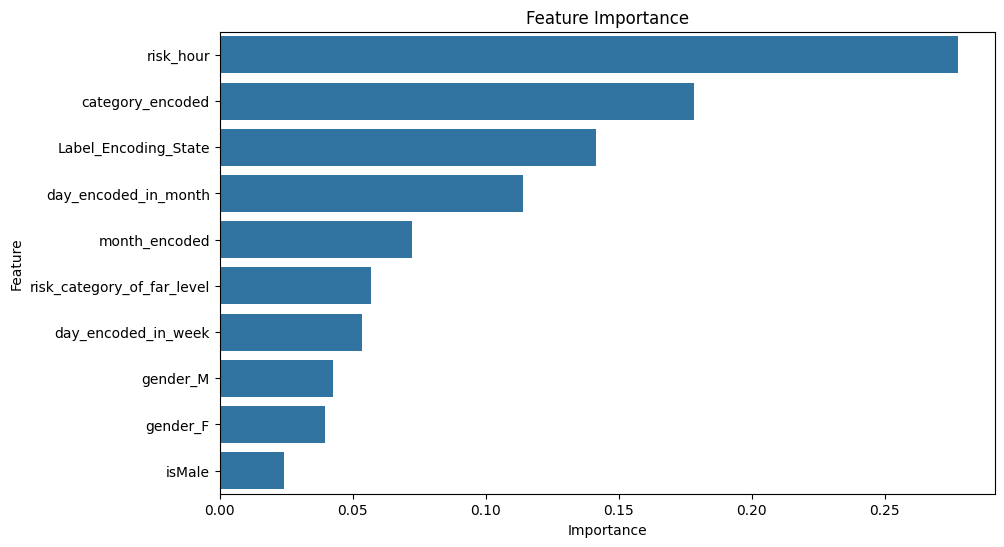

In [ ]:

# Feature Importance
feature_importances = rf_classifier.feature_importances_
feature_names = X_train_smote.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# 3. B Modelling (AdaBoost)

##3.B.1 Hyperparameter Tuning

###Estimating Number of Estimators

In [7]:
# import adaboostclassifier

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
error_rates = []

for i in range(1,20):

    model = AdaBoostClassifier(n_estimators = i)
    model.fit(X_train_smote,y_train_smote)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

###Plotting Error_Rate Vs Number of Estimators

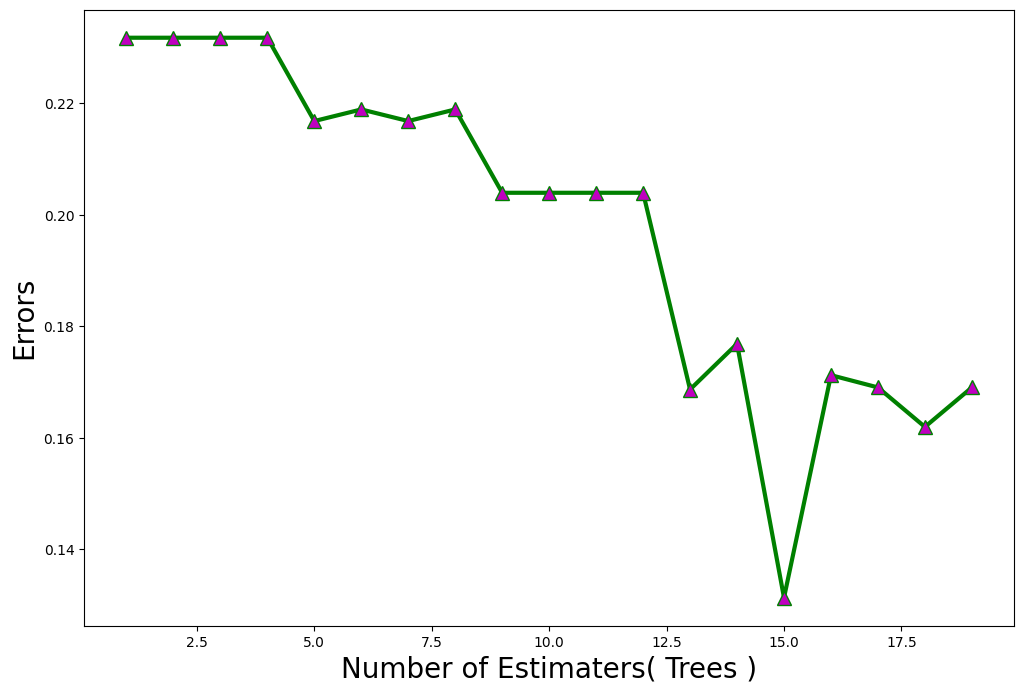

In [ ]:
#Plotting Error_Rate Vs Number of Estimators
plt.figure(figsize = (12,8))
plt.plot(range(1,20),error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

###Plotting Error_Rate Vs Number of Estimators

In [ ]:
error_rates = []

for i in [0.0001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.4,1.5]:

    model = AdaBoostClassifier(learning_rate= i)
    model.fit(X_train_smote,y_train_smote)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

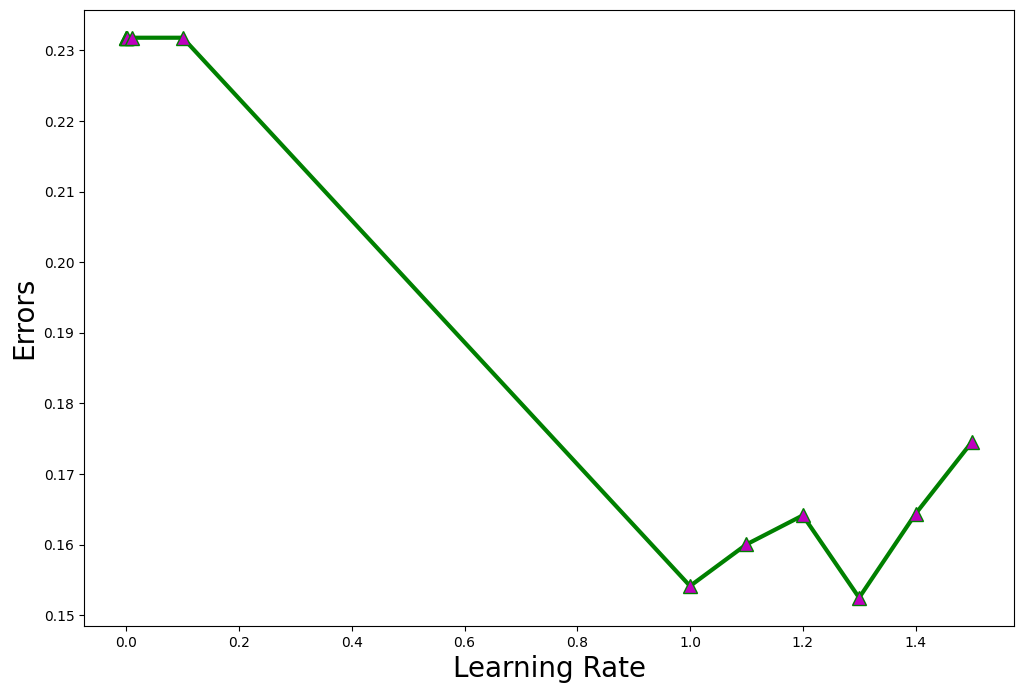

In [ ]:
#Plotting Error and Learning Rate
plt.figure(figsize = (12,8))
plt.plot([0.0001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.4,1.5],error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Learning Rate',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

###Estimating Number of Max Depth

In [8]:
from sklearn.tree import DecisionTreeClassifier

error_rates = []

for i in (1, 25, 50):
    dt = DecisionTreeClassifier(random_state=42,max_depth = i)
    model = AdaBoostClassifier(estimator=dt)
    model.fit(X_train_smote,y_train_smote)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

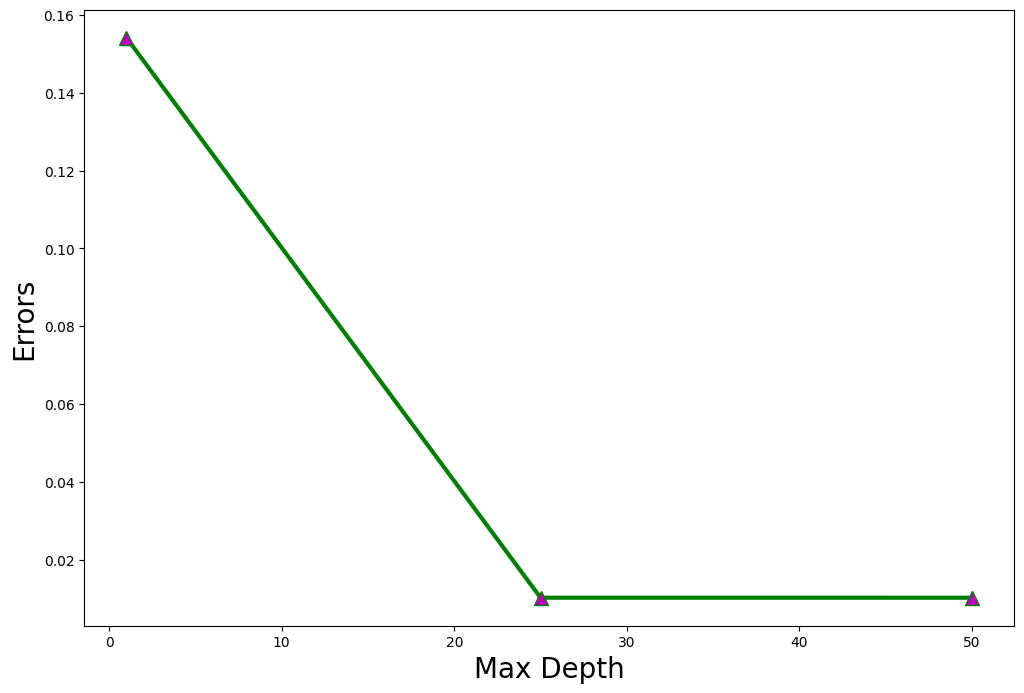

In [11]:
#Plotting Error vs Max Depth

plt.figure(figsize=(12, 8))
plt.plot((1, 25, 50), error_rates, 'g', lw=3, marker="^", markersize=10, markerfacecolor="m")
plt.xlabel('Max Depth', fontsize=20)
plt.ylabel('Errors', fontsize=20)
plt.show()

### Use The Lest error hyper parameter to be the range of hyper parameter tunning

In [12]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint


In [16]:
# Definisikan ruang parameter yang akan ditelusuri
param_grid = {
    'learning_rate': [0.1, 1.3],
    'n_estimators': [15],
    'estimator__max_depth': [25, 50], # Perbaikan: estimator__max_depth
    'estimator': [DecisionTreeClassifier()] # Perbaikan: tambahkan estimator
}

# Inisialisasi model Adaboost (tanpa base_estimator)
adaboost = AdaBoostClassifier(random_state=42) #

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melakukan pencarian parameter terbaik dengan fit
grid_search.fit(X_train_smote, y_train_smote)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)



/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Parameter terbaik: {'estimator': DecisionTreeClassifier(), 'estimator__max_depth': 50, 'learning_rate': 1.3, 'n_estimators': 15}


##3.B.2 Modelling Data

In [17]:
# Latih model dengan parameter terbaik
best_adaboost = grid_search.best_estimator_
best_adaboost.fit(X_train_smote, y_train_smote)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=50),
                   learning_rate=1.3, n_estimators=15, random_state=42)

In [21]:
import joblib
from sklearn.metrics import accuracy_score

In [19]:
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/Fraud_Detection_AdaBoost.joblib' #ganti model_fraud dengan nama model yang diinginkan
joblib.dump(best_adaboost, model_filename)
print(f"Model disimpan di: {model_filename}")

Model disimpan di: /content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 2: Fraud Detection/Fraud_Detection_AdaBoost.joblib


In [31]:
# Evaluasi model pada data test
y_pred_test = best_adaboost.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"kurasi pada data pengujian: {accuracy_test}")


kurasi pada data pengujian: 0.9891312171597207


In [32]:
# Predict on the validation set
y_pred =best_adaboost.predict(X_val)

# Predict probabilities for ROC-AUC evaluation
y_pred_prob = best_adaboost.predict_proba(X_val)[:, 1]

In [33]:
# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
print(f"Akurasi Validation: {accuracy}")

Akurasi Validation: 0.989460208430805


##3.B.3 Matrix Evaluation

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [35]:
# Print classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_val, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Fraud', 'Actual Fraud'], columns=['Predicted Non-Fraud', 'Predicted Fraud'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')
# Calculate ROC-AUC score for model's ability to distinguish between classes
roc_auc = roc_auc_score(y_val, y_pred_prob)
print("ROC-AUC Score:", roc_auc)
print('---------------------------------------------------')

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    193375
           1       0.20      0.27      0.23      1126

    accuracy                           0.99    194501
   macro avg       0.60      0.63      0.61    194501
weighted avg       0.99      0.99      0.99    194501

---------------------------------------------------
Confusion Matrix:
                   Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud               192142             1233
Actual Fraud                      817              309
---------------------------------------------------
ROC-AUC Score: 0.8069254490155128
---------------------------------------------------


##3.B.3 Feature Importance

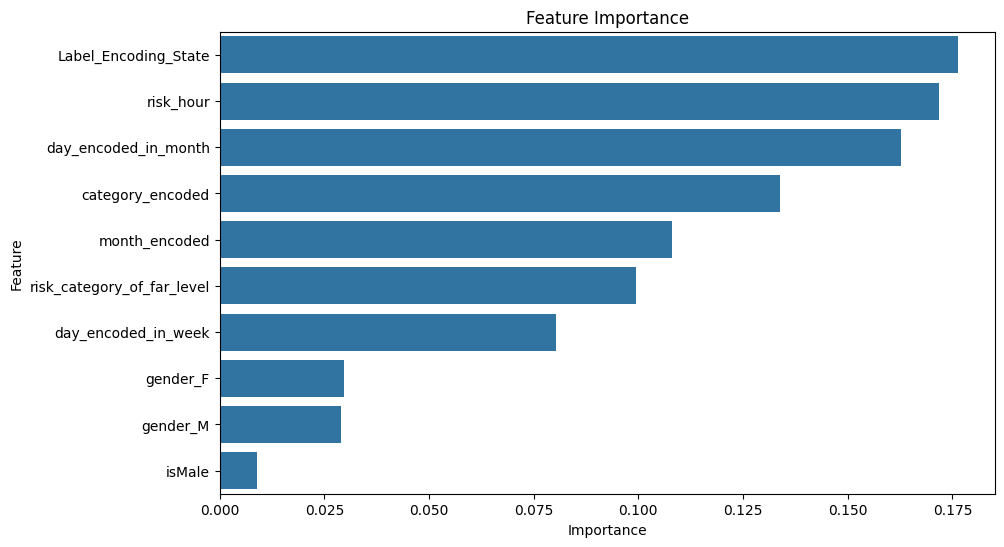

In [36]:
# Feature Importance
feature_importances = best_adaboost.feature_importances_
feature_names = X_train_smote.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# 4. Conclution

Model Random Forest lebih baik untuk pemodelan fraud detection daripada Model AdaBoost:


*   Akurasi Data Validasi Random Forest: 0.990848376100894
*   Akurasi Data Validasi  AdaBoost    : 0.989460208430805

